In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict


#Local PY files
from cleaning_functions import *
from random_lumberjacks.src.random_lumberjacks.model.model_classes import *
from random_lumberjacks.src.random_lumberjacks.visualization.visualization_functions import *

/home/corey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [2]:
#Imports the dataframes
dffo = pd.read_csv("data/submission_format.csv")
dftr = pd.read_csv("data/training_set_features.csv")
dfte = pd.read_csv("data/test_set_features.csv")
dfla = pd.read_csv("data/training_set_labels.csv")

df = pd.merge(dftr, dfla, on="respondent_id")
df = df.set_index("respondent_id")

In [16]:
#Fits imputers
impute_dict = OrderedDict([("household_adults",[np.nan, "median", None]),
                          ("household_children",[np.nan, "median", None]),
                          ])

imputes = get_imputer_objs(df, impute_dict)

In [17]:
df = impute_vals(df, impute_dict, imputes)
df = categorical_nans(df, "unknown")

In [13]:

full_value_counts(df, "rent_or_own")

There are 3 unique values with 2042 nan values making up 7.6%
18736-Own --70.15%
5929-Rent --22.20%


In [ ]:
"behavioral_touch_face" "behavioral_antiviral_meds" "behavioral_wash_hands" "rent_or_own"

There are 4 unique values with 0 nan values making up 0.0%
13560-Employed --50.77%
10231-Not in Labor Force --38.31%
1463-unknown --5.48%
1453-Unemployed --5.44%


In [61]:
df[df["household_children"]=="unknown"]["household_adults"].unique()

array(['unknown'], dtype=object)

In [51]:
df.iloc[20:40]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
20,3,1,0,1,1,1,1,1,1,1,...,Rent,Not in Labor Force,qufhixun,"MSA, Principle City",0,0,unknown,unknown,0,0
21,2,2,0,1,0,1,0,0,1,1,...,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,ldnlellj,mxkfnird,0,1
22,1,1,0,1,0,1,0,0,1,1,...,Own,Employed,fpwskwrf,"MSA, Not Principle City",2,1,wxleyezf,emcorrxb,0,0
23,3,0,1,0,0,1,1,1,1,0,...,Rent,Not in Labor Force,lzgpxyit,Non-MSA,1,2,unknown,unknown,0,0
24,0,1,0,1,0,1,1,1,1,1,...,Own,Unemployed,oxchjgsf,Non-MSA,2,0,unknown,unknown,0,0
25,1,2,0,1,0,1,0,0,1,0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",1,1,wxleyezf,emcorrxb,0,0
26,3,1,0,0,0,1,0,0,0,1,...,unknown,Employed,mlyzmhmf,"MSA, Principle City",1,2,ldnlellj,hfxkjkmi,1,1
27,3,2,0,1,0,1,1,1,1,0,...,Own,Not in Labor Force,bhuqouqj,Non-MSA,1,0,unknown,unknown,0,0
28,0,1,0,0,0,1,0,0,0,0,...,Own,Not in Labor Force,atmpeygn,Non-MSA,1,0,unknown,unknown,0,0


In [ ]:
df = get_imputer_objs(df, impute_dict, imputes)

In [23]:
#Creating column selection dictionaries for the data from lists of column names.

#Lists to go in the dictionaries.

reg_dummies = []
target_col1 = "h1n1_vaccine"
target_col2 = "seasonal_vaccine"
target_cols = [target_col1, target_col2]
untr = ['household_adults', 'household_children',]
nom = df.columns.drop(pd.Index([*untr, *target_cols])).to_numpy().tolist()
# polyc = [*nom, *pay_dummies, "PAY_0"]
#The dicts that come into the arguments.

categorical = {
    "nominal_features":nom,
}

continuous = {"untransformed":untr}
polynomial = {"method":"eliminate", "columns":[]}

In [14]:
nom[0].

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation',
 'h1n1_vaccine',
 'seasonal_vaccine']

In [27]:
data = DataPreprocessor(df, target_col, categorical, continuous, polynomial, True, True,random_state=124)
data.data_preprocessing(balance_class=False, scale_type=False, poly_degree=False)
data.get_df()

Creating Dummies
Skipping polynomial features
Skipping class imbalance functions
No scaling specified
Skipping scaling


,household_adults,household_children,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,behavioral_antiviral_meds_1.0,behavioral_avoidance_1.0,behavioral_face_mask_1.0,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
358,1.0,3.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20097,1.0,0.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24982,1.0,0.0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
12299,1.0,0.0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
8759,0.0,0.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10407,0.0,1.0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
7443,1.0,0.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16022,1.0,0.0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


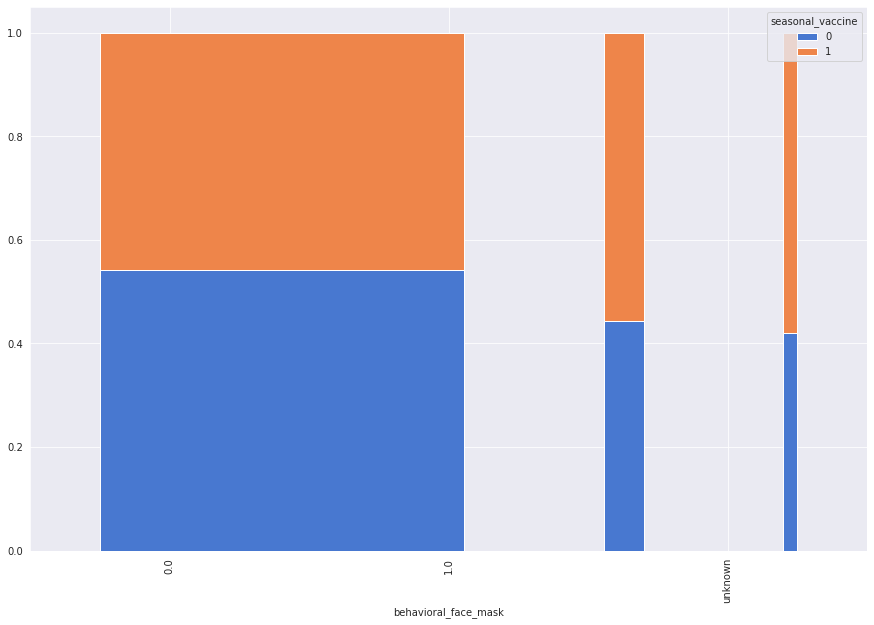

In [31]:
plot_stacked_proportion(df, "behavioral_face_mask", target_col, .1)